In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

d:\Anaconda\envs\cursito\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_argentina = df[df['job_country'] == 'Argentina'].copy()

In [3]:
# Lets create a new column 'job_posted_monthly' that contains the abreviate month name
df_argentina['job_posted_month'] = df_argentina['job_posted_date'].dt.strftime('%B')

In [4]:
#df_argentina.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')# esta tabla tiene el job_posted_month como indice sorteado en orden alfabetico y no cronologico

df_argentina_pivot = df_argentina.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_argentina_pivot.reset_index(inplace=True)  # resetea el indice y crea una nueva columna con el indice anterior, esto nos va a facilitar para crear un numero
#df_argentina_pivot.reset_index() # resetea el indice y crea una nueva columna con el indice anterior, esto nos va a facilitar para crear un numero



In [5]:
df_argentina_pivot['month_number'] = pd.to_datetime(df_argentina_pivot['job_posted_month'], format='%B').dt.month
df_argentina_pivot.sort_values('month_number', inplace=True)


In [11]:
df_argentina_pivot.set_index('job_posted_month', inplace=True)

KeyError: "None of ['job_posted_month'] are in the columns"

In [7]:
df_argentina_pivot.drop('month_number', axis=1, inplace=True)

In [ ]:
df_argentina_pivot.to_csv('df_argentina_pivot.csv', index=False)

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
4,January,50,52,117,167,131,22,24,45,38,202,1
3,February,15,8,68,98,67,19,13,28,10,46,2
7,March,19,11,58,150,85,17,9,47,21,61,3
0,April,38,7,79,175,86,16,19,46,21,51,4
8,May,17,3,39,91,56,10,8,46,9,34,5
6,June,18,10,75,156,114,20,11,35,22,27,6
5,July,37,25,138,195,207,35,32,46,41,91,7
1,August,58,62,219,292,256,40,59,97,60,224,8
11,September,49,33,141,228,163,19,20,50,37,119,9
10,October,68,46,172,300,178,30,23,104,37,188,10


<Axes: xlabel='job_posted_month'>

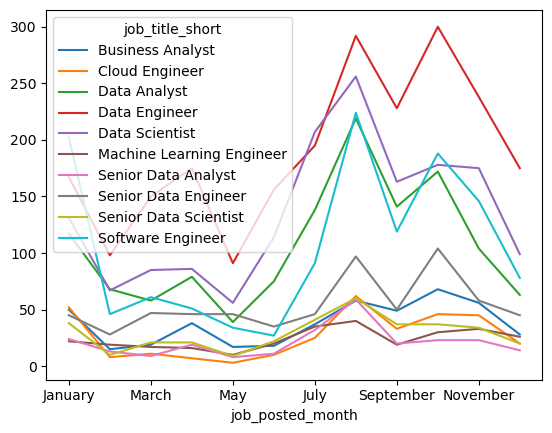

In [9]:
df_argentina_pivot.plot(kind='line')

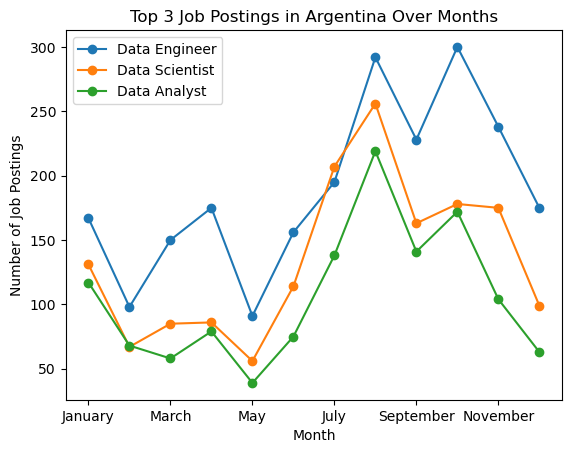

In [10]:
top_3_jobs = df_argentina['job_title_short'].value_counts().nlargest(3).index.tolist()
df_argentina_pivot[top_3_jobs].plot(kind='line', marker='o')
plt.title('Top 3 Job Postings in Argentina Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.legend()


In [7]:
df_argentina

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
236,Data Scientist,Científico de Datos LLM,Anywhere,via LinkedIn,Full-time,True,Argentina,2023-10-08 13:46:02,False,False,Argentina,None,NaN,NaN,Turing,None,None,October
417,Senior Data Scientist,Data Science SR Puerto Madero,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-07-03 13:17:35,False,False,Argentina,None,NaN,NaN,Werben Capital Human,"['java', 'scala']","{'programming': ['java', 'scala']}",July
863,Data Engineer,Data Engineer Jr,Argentina,via LinkedIn,Full-time,False,Argentina,2023-05-31 14:00:43,True,False,Argentina,None,NaN,NaN,Randstad Argentina,"['python', 'azure']","{'cloud': ['azure'], 'programming': ['python']}",May
1131,Data Scientist,Data & Applied Intelligence #hub,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-09-03 13:43:27,False,False,Argentina,None,NaN,NaN,Accenture,"['sql', 'python', 'sql server', 'postgresql', ...","{'cloud': ['azure', 'aws', 'gcp'], 'databases'...",September
1140,Software Engineer,Visual Basic Developer (with Data experience) ...,Anywhere,via LinkedIn,Full-time,True,Argentina,2023-03-19 13:45:03,True,False,Argentina,None,NaN,NaN,Listopro,"['excel', 'confluence']","{'analyst_tools': ['excel'], 'async': ['conflu...",March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785605,Senior Data Engineer,"Sr. Data Architect, Professional Services","Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-08-01 06:34:24,False,False,Argentina,None,NaN,NaN,Emprego,"['sql', 'java', 'javascript', 'python', 'nosql...","{'cloud': ['aws', 'redshift'], 'databases': ['...",August
785608,Software Engineer,Senior Software Engineer,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-09-28 06:29:25,True,False,Argentina,None,NaN,NaN,Emprego,"['php', 'javascript', 'css', 'sass', 'sql', 'n...","{'libraries': ['react', 'graphql', 'kafka'], '...",September
785638,Data Analyst,Data Analyst,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-27 06:47:13,False,False,Argentina,None,NaN,NaN,Emprego,"['python', 'r', 'sql', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'prog...",October
785668,Data Analyst,Jr Data Analyst,Argentina,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-08-29 06:47:14,True,False,Argentina,None,NaN,NaN,Emprego,"['python', 'excel', 'tableau', 'power bi', 'sp...","{'analyst_tools': ['excel', 'tableau', 'power ...",August
